In [86]:
%pip install matplotlib numpy pandas seaborn scikit-learn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler

  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Cleaning

In [48]:
df = pd.read_csv("./Spotify Most Streamed Songs.csv")
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Not Found


The following code will:
- Group the different columns into better recognizable sections
- rename ambigious column names (**streams => spotify_streams**)
- dropped a column that gave no meaningful information (**cover_url**)
- make the mode column be in 0 an 1 for better data analysis (**Major = 0, Minor = 1**)
- make the key column be from 0 to 12 for better data analysis (**A is 0, G# = 12, and NaN = NaN**)
- changes the type of the in_deezer_playlist from obj to float64

In [49]:
df = df.rename(columns={'streams': 'spotify_streams'})
df = df.drop('cover_url', axis=1)
df = df.set_index(['track_name', 'artist(s)_name'])
# Defining groups of 
date_cols = ['released_year', 'released_month', 'released_day']
spotify_col = ['in_spotify_playlists', 'in_spotify_charts', 'spotify_streams']
apple_col = ['in_apple_playlists', 'in_apple_charts']
deezer_col = ['in_deezer_playlists', 'in_deezer_charts']
playlists_col = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
charts_col = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']
musical_info_col = ['bpm', 'key', 'mode']

In [50]:
df['mode'] = df['mode'].map({'Major': 0, 'Minor': 1}) 
mode_dict = {0: 'Major', 1: 'Minor'}

In [51]:
df["key"] = df['key'].map({
    'A': 0,
    'A#': 1,
    'B': 2,
    'C': 3,
    'C#': 4,
    'D': 5,
    'D#': 6,
    'E': 7,
    'F': 8,
    'F#': 9,
    'G': 10,
    'G#': 11,
    np.nan: np.nan
})
key_dict = {
    0 : 'A',
    1 : 'A#',
    2 : 'B',
    3 : 'C',
    4 : 'C#',
    5 : 'D',
    6 : 'D#',
    7 : 'E',
    8 : 'F',
    9 : 'F#',
    10 : 'G',
    11 : 'G#',
    np.nan : np.nan
}

In [52]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',','').astype('int64')

# Data Analysis

In [79]:
df['average_playlists'] = df[playlists_col].mean(axis=1)
df['average_chart'] = df[charts_col].mean(axis=1)

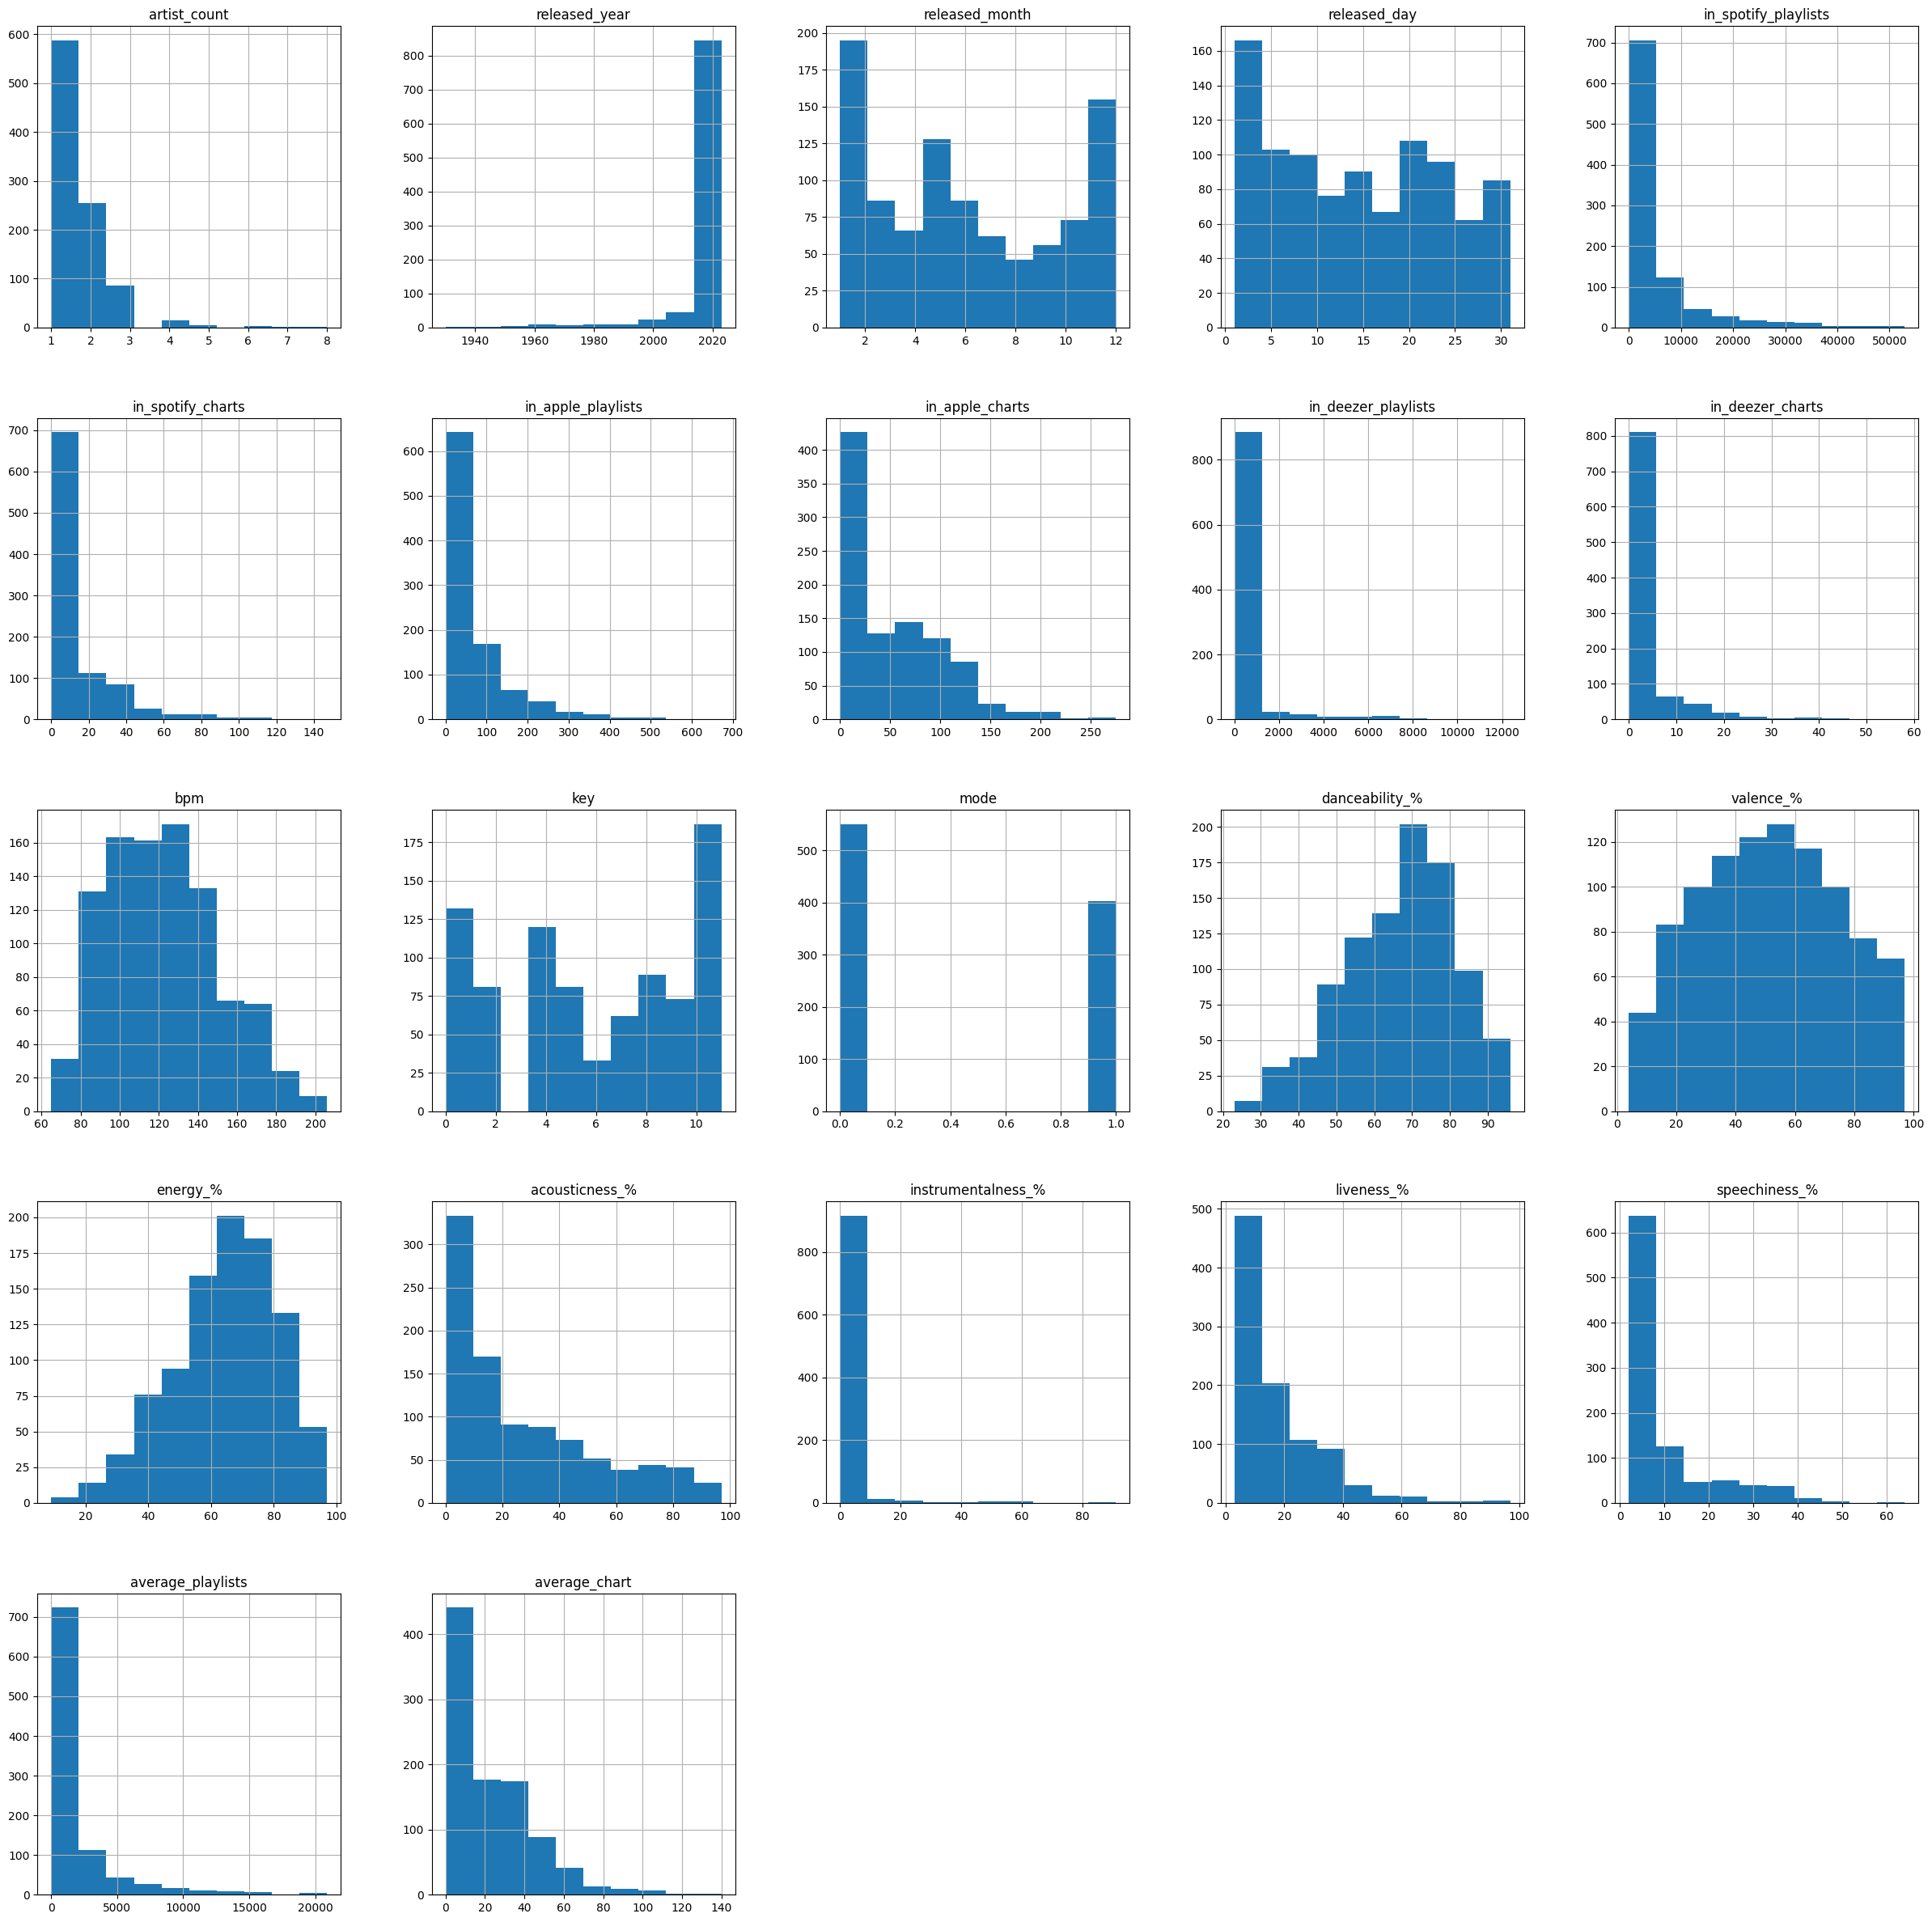

In [84]:
df.hist(figsize=(30,30))
plt.show()

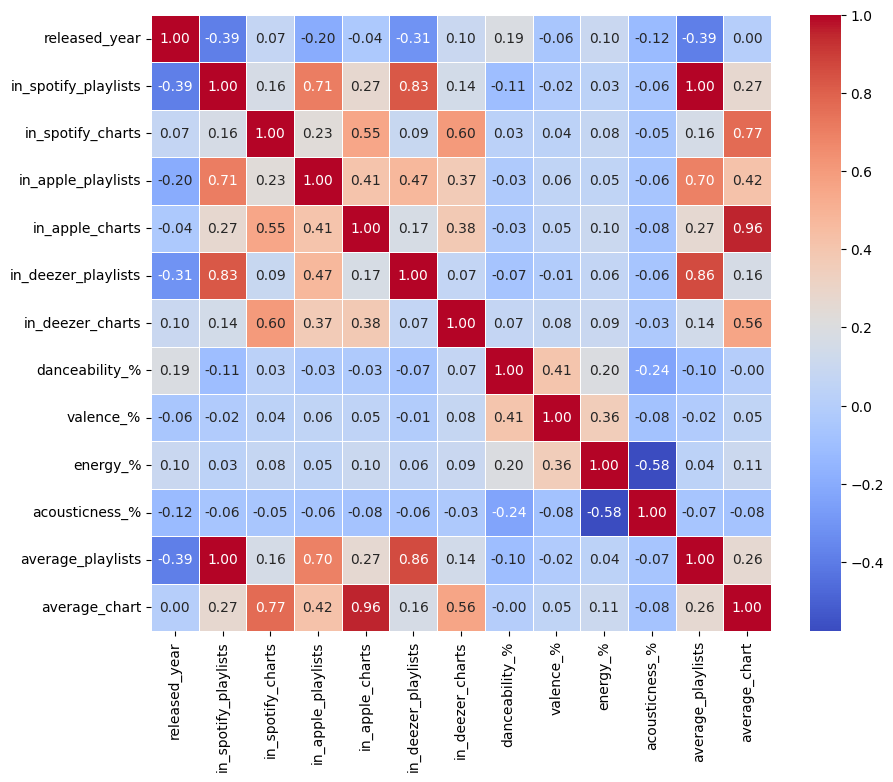

In [ ]:
corr_matrix = df.select_dtypes(include = ['float64', 'int64']).corr()
mask = np.abs(corr_matrix) >= 0.3
np.fill_diagonal(mask.values, False)
cols_to_keep = mask.any()
cols_to_keep = cols_to_keep[cols_to_keep].index
corr_filter = corr_matrix.loc[cols_to_keep, cols_to_keep]

plt.figure(figsize=(10,8))
sns.heatmap(corr_filter, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.show()

In [ ]:
scaler = StandardScaler()
df_n = scaler.fit_transform(df.copy)

# IDK what to call this section

In [13]:
energy_bpm_dance_df = df[['energy_%', 'bpm', 'danceability_%']].copy()
energy_bpm_dance_df

,,energy_%,bpm,danceability_%
track_name,artist(s)_name,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",83,125,80
LALA,Myke Towers,74,92,71
vampire,Olivia Rodrigo,53,138,51
Cruel Summer,Taylor Swift,72,170,55
WHERE SHE GOES,Bad Bunny,80,144,65
...,...,...,...,...
My Mind & Me,Selena Gomez,39,144,60
Bigger Than The Whole Sky,Taylor Swift,24,166,42
A Veces (feat. Feid),"Feid, Paulo Londra",67,92,80
